In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Data_without_Scaling_&_without_Outliers_Treatment.csv")



In [3]:
df.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V17,V18,V19,V20,V25,V28,V29,V30,V31,V32
0,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,...,40.0,1,1,0,46500.0,0,0,0,TIER 1,0
1,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,...,47.0,1,1,0,28168.0,0,0,0,TIER 1,0
2,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,...,31.0,9,6,3,38900.0,31,31,16,TIER 1,0
3,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,...,24.0,1,1,0,42900.0,0,0,0,TIER 1,0
4,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,...,30.0,1,1,0,40900.0,0,0,0,TIER 1,0


In [4]:
df.groupby('V32')['V2'].value_counts(normalize=True)

V32  V2
0    0     0.971488
     1     0.028512
1    0     0.957929
     1     0.042071
Name: V2, dtype: float64

Percentage of customers who have bounced their first EMI payment: 2.88%
Distribution of first EMI bounces among defaulters and non-defaulters:
V2          0         1
V32                    
0    0.971488  0.028512
1    0.957929  0.042071


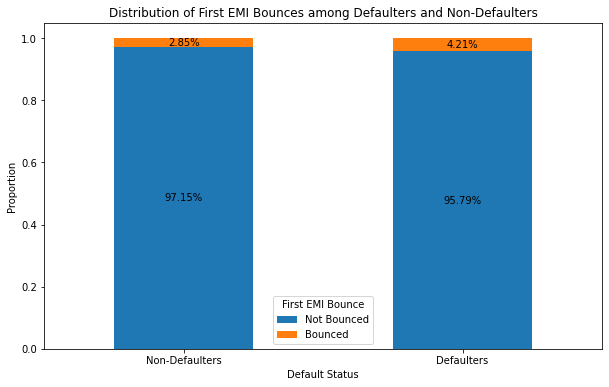

In [5]:
import matplotlib.pyplot as plt

# Calculate the percentage of customers who have bounced their first EMI payment
total_customers = len(df)
first_emi_bounced = df['V2'].sum()
percentage_bounced = (first_emi_bounced / total_customers) * 100

print(f"Percentage of customers who have bounced their first EMI payment: {percentage_bounced:.2f}%")

# Distribution of first EMI bounces among defaulters and non-defaulters
distribution_bounce = df.groupby('V32')['V2'].value_counts(normalize=True).unstack()

print("Distribution of first EMI bounces among defaulters and non-defaulters:")
print(distribution_bounce)

# Plot the distribution
# Define labels for the plot
bounce_labels = ['Not Bounced', 'Bounced']
default_labels = ['Non-Defaulters', 'Defaulters']

# Create a bar plot
ax = distribution_bounce.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of First EMI Bounces among Defaulters and Non-Defaulters')
plt.xlabel('Default Status')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=default_labels, rotation=0)
plt.legend(bounce_labels, title='First EMI Bounce')

# Add numbers inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()


Average loan amount for all customers: 39338.08
Distribution of loan amounts between defaulters and non-defaulters:
V32
0    39309.596642
1    40616.281014
Name: V7, dtype: float64


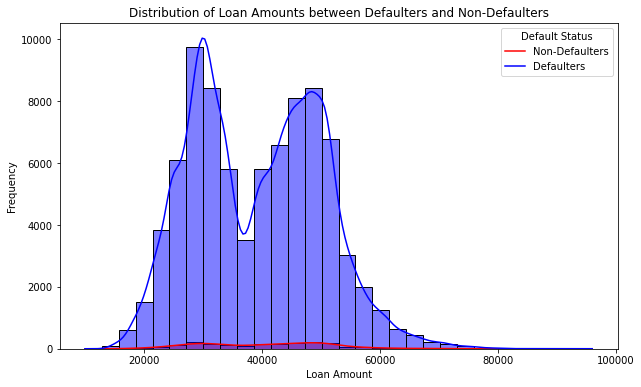

In [6]:


# Calculate the average loan amount for all customers
average_loan_amount = df['V7'].mean()
print(f"Average loan amount for all customers: {average_loan_amount:.2f}")

# Distribution of loan amounts between defaulters and non-defaulters
loan_amount_distribution = df.groupby('V32')['V7'].mean()
print("Distribution of loan amounts between defaulters and non-defaulters:")
print(loan_amount_distribution)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='V7', hue='V32', kde=True, palette={0: 'blue', 1: 'red'}, bins=30)
plt.title('Distribution of Loan Amounts between Defaulters and Non-Defaulters')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.legend(title='Default Status', labels=['Non-Defaulters', 'Defaulters'])
plt.show()


Distribution of employment types among all customers:
SELF         59290
SAL          23360
HOUSEWIFE     1670
STUDENT        449
PENS           279
Name: V14, dtype: int64
Percentage of defaulters by employment type:
V14
HOUSEWIFE    1.017964
PENS         0.716846
SAL          1.797945
SELF         2.376455
STUDENT      1.336303
Name: V32, dtype: float64


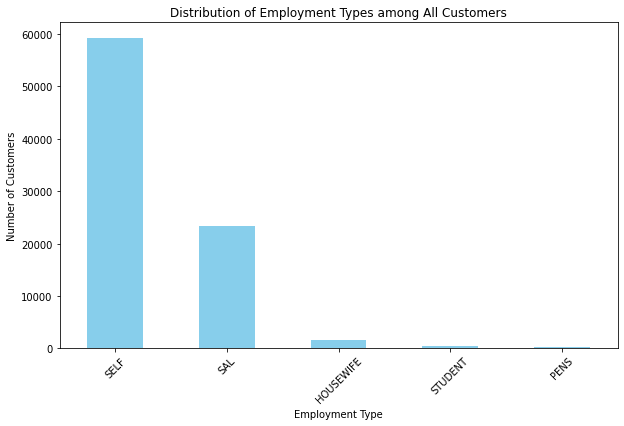

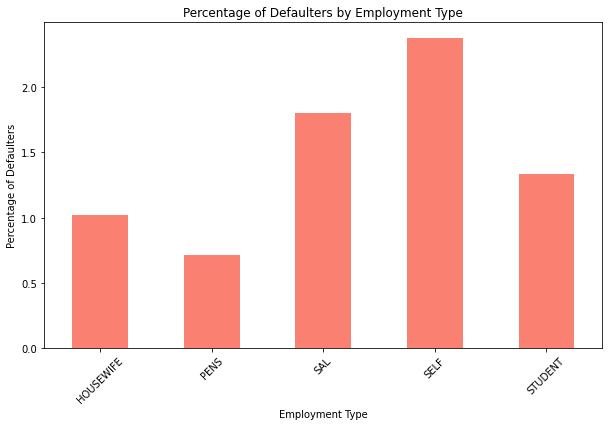

In [7]:

# Distribution of employment types among all customers
employment_type_distribution = df['V14'].value_counts()
print("Distribution of employment types among all customers:")
print(employment_type_distribution)

# Calculate the percentage of defaulters in each employment type
employment_defaulter_percentage = df.groupby('V14')['V32'].mean() * 100
print("Percentage of defaulters by employment type:")
print(employment_defaulter_percentage)

# Plot the distribution of employment types among all customers
plt.figure(figsize=(10, 6))
employment_type_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Employment Types among All Customers')
plt.xlabel('Employment Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Plot the percentage of defaulters by employment type
plt.figure(figsize=(10, 6))
employment_defaulter_percentage.plot(kind='bar', color='salmon')
plt.title('Percentage of Defaulters by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Percentage of Defaulters')
plt.xticks(rotation=45)
plt.show()


Average age of customers when they take out a loan: 37.00364500047032


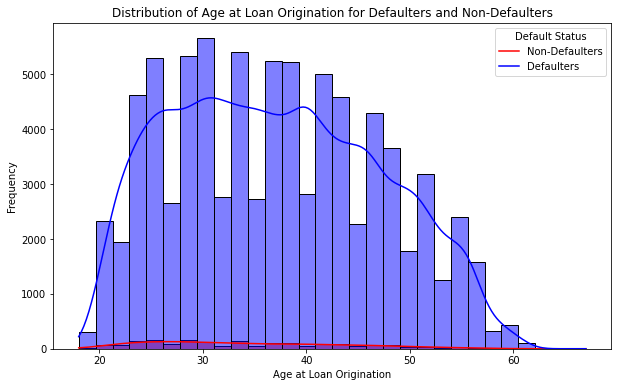

Default rate by age group:
V17
[18, 25)    3.130930
[25, 35)    2.681071
[35, 45)    1.890048
[45, 55)    1.533315
[55, 65)    1.142236
[65, 75)    0.000000
[75, 85)         NaN
Name: V32, dtype: float64


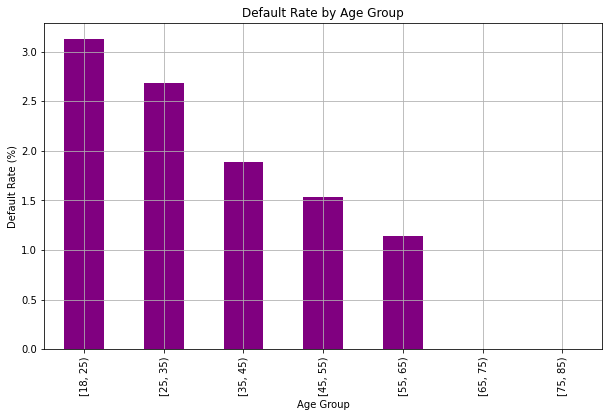

Age group with the highest rate of defaults: [18, 25)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average age of customers when they take out a loan
average_age = df['V17'].mean()
print("Average age of customers when they take out a loan:", average_age)

# Visualize the distribution of age at loan origination for defaulters and non-defaulters
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='V17', hue='V32', kde=True, palette={0: 'blue', 1: 'red'}, bins=30)
plt.title('Distribution of Age at Loan Origination for Defaulters and Non-Defaulters')
plt.xlabel('Age at Loan Origination')
plt.ylabel('Frequency')
plt.legend(title='Default Status', labels=['Non-Defaulters', 'Defaulters'])
plt.show()

# Identify the age group with the highest rate of defaults
age_groups = pd.cut(df['V17'], bins=[18, 25, 35, 45, 55, 65, 75, 85], right=False)
default_rate_by_age_group = df.groupby(age_groups)['V32'].mean() * 100
print("Default rate by age group:")
print(default_rate_by_age_group)

# Plot the default rate by age group
plt.figure(figsize=(10, 6))
default_rate_by_age_group.plot(kind='bar', color='purple')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate (%)')
plt.grid(True)
plt.show()

# Identify the age group with the highest rate of defaults
highest_default_rate_age_group = default_rate_by_age_group.idxmax()
print("Age group with the highest rate of defaults:", highest_default_rate_age_group)


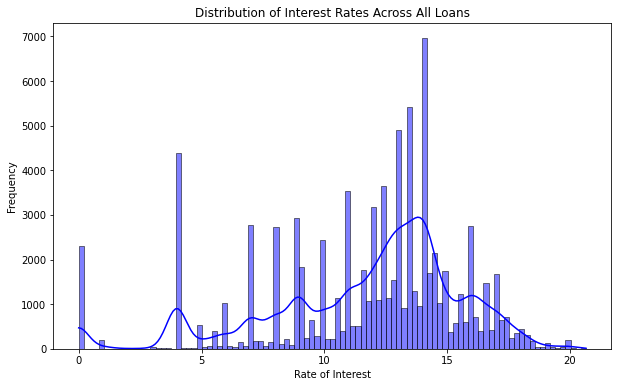

Average interest rate for non-defaulters: 11.700563021371734
Average interest rate for defaulters: 11.84918554476807


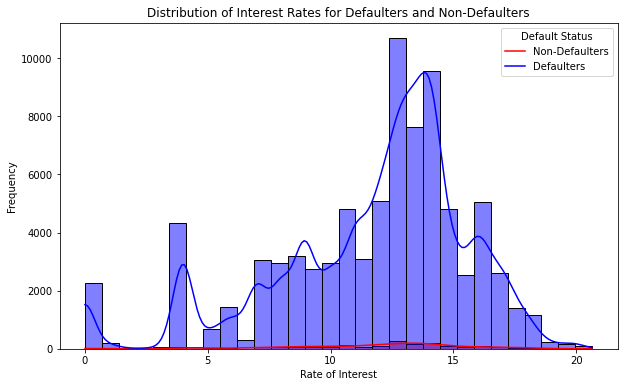

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize the distribution of interest rates across all loans
plt.figure(figsize=(10, 6))
sns.histplot(df['V12'], kde=True, color='blue')
plt.title('Distribution of Interest Rates Across All Loans')
plt.xlabel('Rate of Interest')
plt.ylabel('Frequency')
plt.show()

# Calculate and compare the average interest rate for defaulters and non-defaulters
average_interest_rate = df.groupby('V32')['V12'].mean()
print("Average interest rate for non-defaulters:", average_interest_rate[0])
print("Average interest rate for defaulters:", average_interest_rate[1])

# Visualize the distribution of interest rates for defaulters and non-defaulters
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='V12', hue='V32', kde=True, palette={0: 'blue', 1: 'red'}, bins=30)
plt.title('Distribution of Interest Rates for Defaulters and Non-Defaulters')
plt.xlabel('Rate of Interest')
plt.ylabel('Frequency')
plt.legend(title='Default Status', labels=['Non-Defaulters', 'Defaulters'])
plt.show()


Percentage of customers who bounced their first EMI payment: 2.88%
Default rate for customers who did not bounce their first EMI payment: 2.150173127678636
Default rate for customers who bounced their first EMI payment: 3.183673469387755


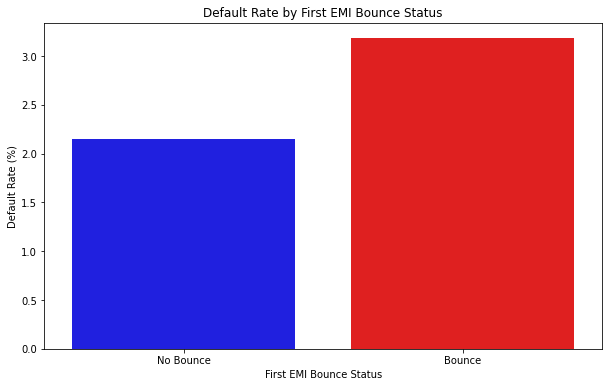

In [10]:

# Calculate the percentage of customers who bounced their first EMI payment
first_emi_bounce_rate = df['V2'].mean() * 100
print(f"Percentage of customers who bounced their first EMI payment: {first_emi_bounce_rate:.2f}%")

# Calculate the default rate for customers who bounced their first EMI payment and those who did not
default_rate_by_first_emi_bounce = df.groupby('V2')['V32'].mean() * 100
print("Default rate for customers who did not bounce their first EMI payment:", default_rate_by_first_emi_bounce[0])
print("Default rate for customers who bounced their first EMI payment:", default_rate_by_first_emi_bounce[1])

# Visualize the default rates for both groups
plt.figure(figsize=(10, 6))
sns.barplot(x=['No Bounce', 'Bounce'], y=default_rate_by_first_emi_bounce, palette=['blue', 'red'])
plt.title('Default Rate by First EMI Bounce Status')
plt.xlabel('First EMI Bounce Status')
plt.ylabel('Default Rate (%)')
plt.show()


Default rates by employment type:
V14
SELF         2.376455
SAL          1.797945
STUDENT      1.336303
HOUSEWIFE    1.017964
PENS         0.716846
Name: V32, dtype: float64


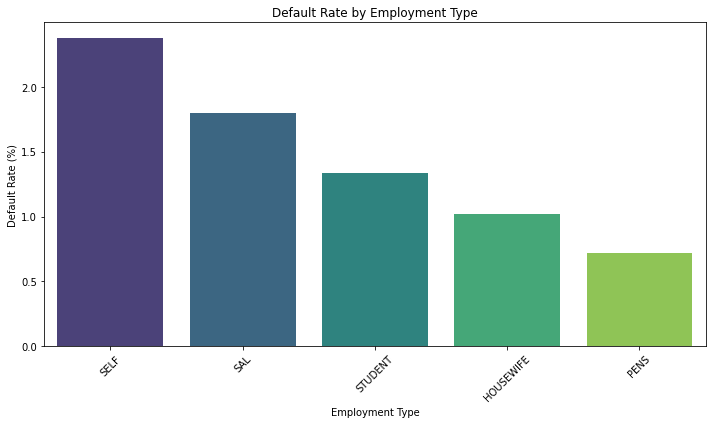

In [11]:

# Calculate default rates by employment type
default_rates_by_employment = df.groupby('V14')['V32'].mean() * 100

# Sort employment types by default rate descending
default_rates_by_employment = default_rates_by_employment.sort_values(ascending=False)

# Print default rates for each employment type
print("Default rates by employment type:")
print(default_rates_by_employment)

# Visualize default rates by employment type
plt.figure(figsize=(10, 6))
sns.barplot(x=default_rates_by_employment.index, y=default_rates_by_employment.values, palette='viridis')
plt.title('Default Rate by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average interest rate for defaulters and non-defaulters:
V32
0    11.700563
1    11.849186
Name: V12, dtype: float64


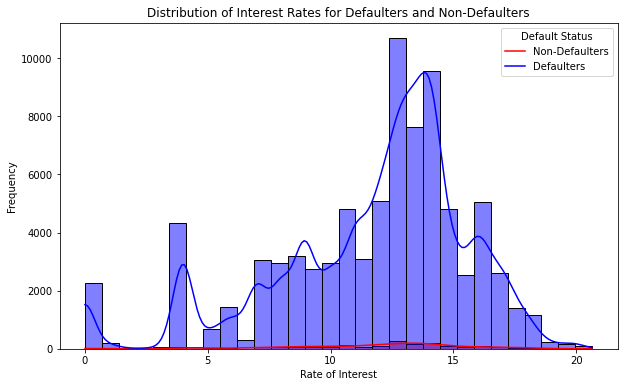

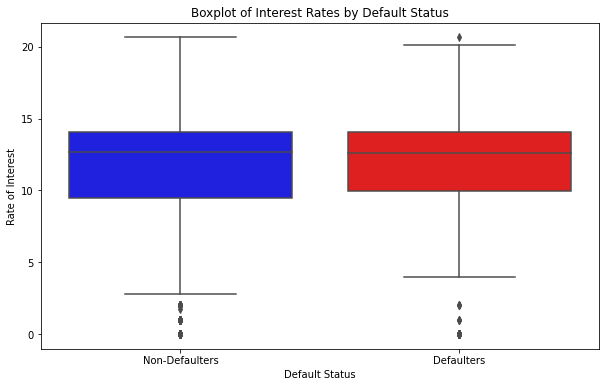

In [12]:

# Calculate the average interest rate for defaulters and non-defaulters
average_interest_rate = df.groupby('V32')['V12'].mean()
print("Average interest rate for defaulters and non-defaulters:")
print(average_interest_rate)

# Visualize the distribution of interest rates for defaulters and non-defaulters
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='V12', hue='V32', kde=True, palette={0: 'blue', 1: 'red'}, bins=30)
plt.title('Distribution of Interest Rates for Defaulters and Non-Defaulters')
plt.xlabel('Rate of Interest')
plt.ylabel('Frequency')
plt.legend(title='Default Status', labels=['Non-Defaulters', 'Defaulters'])
plt.show()

# Boxplot to show the distribution of interest rates by default status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='V32', y='V12', palette={0: 'blue', 1: 'red'})
plt.title('Boxplot of Interest Rates by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Rate of Interest')
plt.xticks([0, 1], ['Non-Defaulters', 'Defaulters'])
plt.show()


Average tenure for defaulters and non-defaulters:
V32
0    21.043849
1    21.786947
Name: V8, dtype: float64


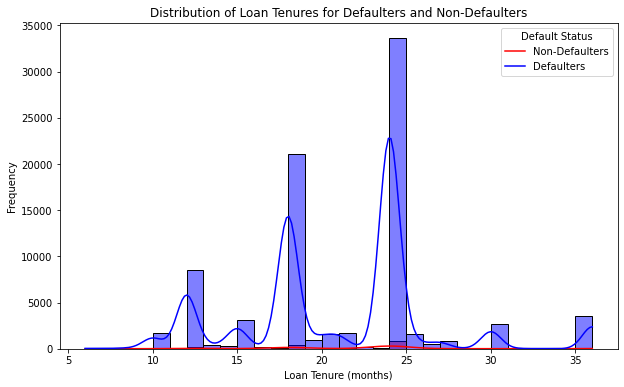

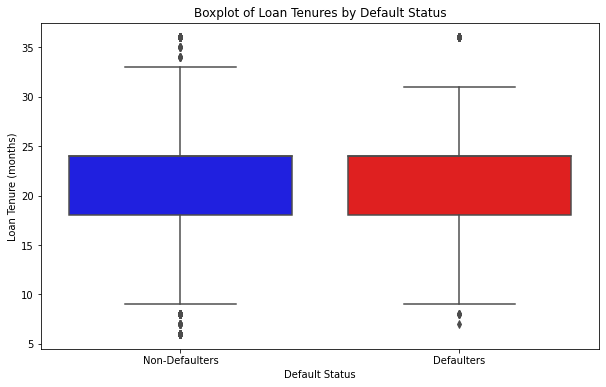

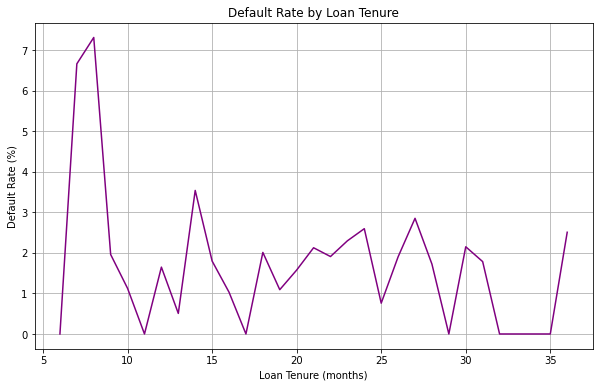

In [13]:
# Calculate the average tenure for defaulters and non-defaulters
average_tenure = df.groupby('V32')['V8'].mean()
print("Average tenure for defaulters and non-defaulters:")
print(average_tenure)

# Visualize the distribution of loan tenures for defaulters and non-defaulters
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='V8', hue='V32', kde=True, palette={0: 'blue', 1: 'red'}, bins=30)
plt.title('Distribution of Loan Tenures for Defaulters and Non-Defaulters')
plt.xlabel('Loan Tenure (months)')
plt.ylabel('Frequency')
plt.legend(title='Default Status', labels=['Non-Defaulters', 'Defaulters'])
plt.show()

# Boxplot to show the distribution of loan tenures by default status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='V32', y='V8', palette={0: 'blue', 1: 'red'})
plt.title('Boxplot of Loan Tenures by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Loan Tenure (months)')
plt.xticks([0, 1], ['Non-Defaulters', 'Defaulters'])
plt.show()

# Analyzing the relationship between loan tenure and default rate
tenure_default_rate = df.groupby('V8')['V32'].mean() * 100
plt.figure(figsize=(10, 6))
tenure_default_rate.plot(kind='line', color='purple')
plt.title('Default Rate by Loan Tenure')
plt.xlabel('Loan Tenure (months)')
plt.ylabel('Default Rate (%)')
plt.grid(True)
plt.show()


Default rate by tenure group:
V8
[0, 6)           NaN
[6, 12)     1.390268
[12, 18)    1.689373
[18, 24)    1.961914
[24, 30)    2.515422
[30, 36)    2.096220
[36, 42)    2.510345
Name: V32, dtype: float64


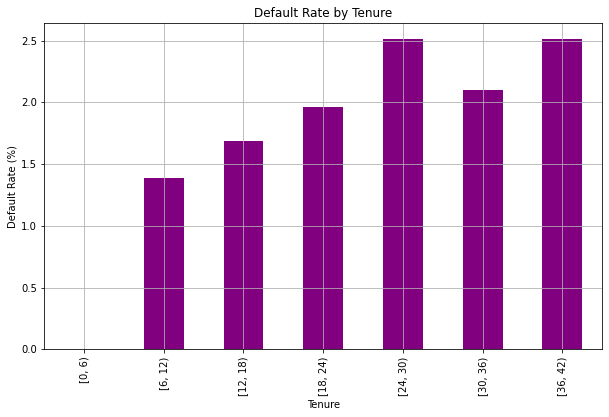

In [14]:
# Identify the age group with the highest rate of defaults
tenure_group = pd.cut(x=df['V8'],bins=(0,6,12,18,24,30,36,42),right=False)
default_rate_by_tenure_group = df.groupby(tenure_group)['V32'].mean() * 100
print("Default rate by tenure group:")
print(default_rate_by_tenure_group)

# Plot the default rate by tenure group
plt.figure(figsize=(10, 6))
default_rate_by_tenure_group.plot(kind='bar', color='purple')
plt.title('Default Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Default Rate (%)')
plt.grid(True)
plt.show()

In [15]:
pd.crosstab(df['V8'],df['V32'])

V32,0,1
V8,,
6.0,59,0
7.0,14,1
8.0,76,6
9.0,100,2
10.0,1670,19
11.0,67,0
12.0,8525,143
13.0,392,2
14.0,354,13


In [16]:
df.groupby('V8')['V32'].mean() * 100

V8
6.0     0.000000
7.0     6.666667
8.0     7.317073
9.0     1.960784
10.0    1.124926
11.0    0.000000
12.0    1.649746
13.0    0.507614
14.0    3.542234
15.0    1.799811
16.0    1.030928
17.0    0.000000
18.0    2.012456
19.0    1.092896
20.0    1.577287
21.0    2.127660
22.0    1.910828
23.0    2.298851
24.0    2.598268
25.0    0.759975
26.0    1.904762
27.0    2.854007
28.0    1.724138
29.0    0.000000
30.0    2.152080
31.0    1.785714
32.0    0.000000
33.0    0.000000
34.0    0.000000
35.0    0.000000
36.0    2.510345
Name: V32, dtype: float64

In [17]:
pd.crosstab(df['V3'],df['V32'])

V32,0,1
V3,,
0,57808,947
1,16164,455
2,6261,282
3,2181,120
4,587,37
5,119,6
6,35,2
7,10,0
8,7,1


Average number of bounces for defaulters and non-defaulters:
V32
0    0.465683
1    0.873786
Name: V3, dtype: float64


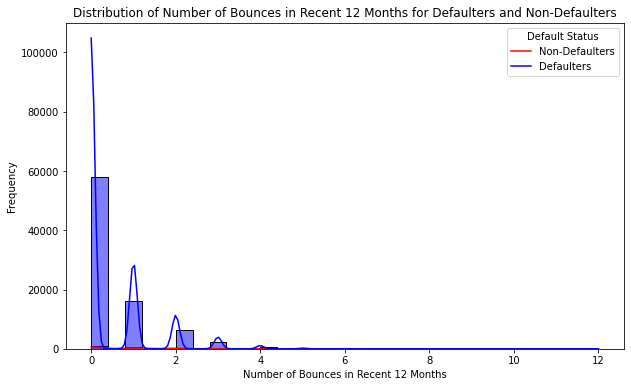

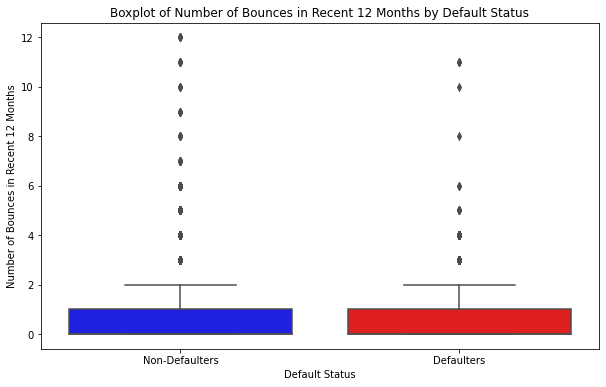

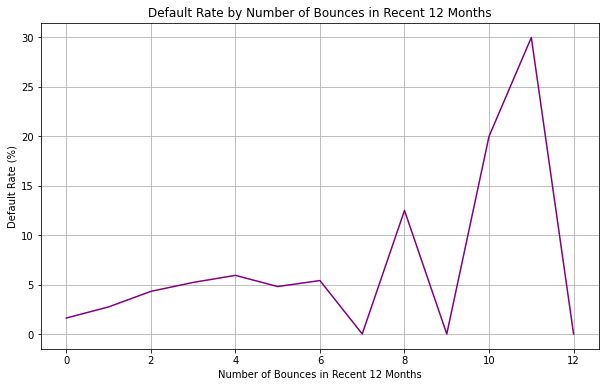

Threshold number of bounces beyond which the probability of default increases significantly:
Series([], Name: V32, dtype: float64)


In [18]:
# Calculate the average number of bounces for defaulters and non-defaulters
average_bounces = df.groupby('V32')['V3'].mean()
print("Average number of bounces for defaulters and non-defaulters:")
print(average_bounces)

# Visualize the distribution of the number of bounces for defaulters and non-defaulters
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='V3', hue='V32', kde=True, palette={0: 'blue', 1: 'red'}, bins=30)
plt.title('Distribution of Number of Bounces in Recent 12 Months for Defaulters and Non-Defaulters')
plt.xlabel('Number of Bounces in Recent 12 Months')
plt.ylabel('Frequency')
plt.legend(title='Default Status', labels=['Non-Defaulters', 'Defaulters'])
plt.show()

# Boxplot to show the distribution of number of bounces by default status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='V32', y='V3', palette={0: 'blue', 1: 'red'})
plt.title('Boxplot of Number of Bounces in Recent 12 Months by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Number of Bounces in Recent 12 Months')
plt.xticks([0, 1], ['Non-Defaulters', 'Defaulters'])
plt.show()

# Analyzing the relationship between number of bounces and default rate
bounces_default_rate = df.groupby('V3')['V32'].mean() * 100
plt.figure(figsize=(10, 6))
bounces_default_rate.plot(kind='line', color='purple')
plt.title('Default Rate by Number of Bounces in Recent 12 Months')
plt.xlabel('Number of Bounces in Recent 12 Months')
plt.ylabel('Default Rate (%)')
plt.grid(True)
plt.show()

# Determine if there is a threshold number of bounces beyond which the probability of default increases significantly
threshold_bounces = df.groupby('V3')['V32'].mean()
threshold_bounces = threshold_bounces[threshold_bounces > 0.5]
print("Threshold number of bounces beyond which the probability of default increases significantly:")
print(threshold_bounces)


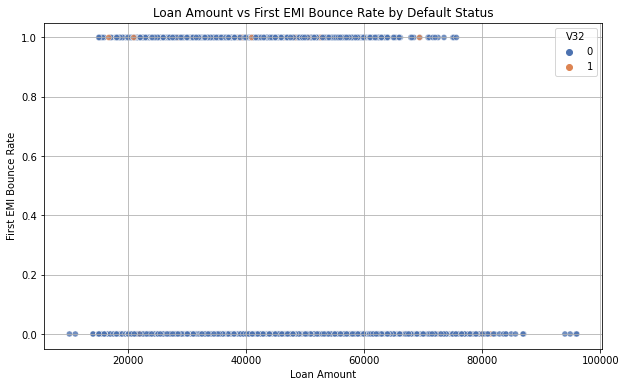

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

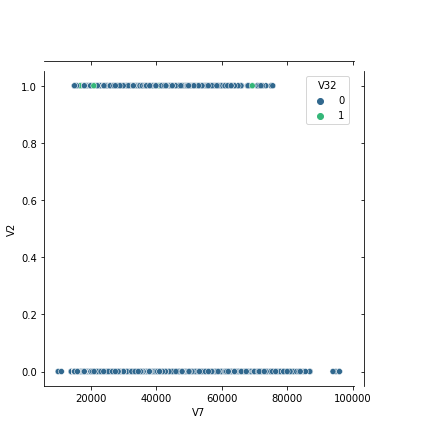

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the relationship between Loan Amount, First EMI Bounce Rate, and Default Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='V7', y='V2', hue='V32', data=df,palette='deep', alpha=0.8)
plt.title('Loan Amount vs First EMI Bounce Rate by Default Status')
plt.xlabel('Loan Amount')
plt.ylabel('First EMI Bounce Rate')
#plt.legend(title='Default Status', loc='upper right', labels=['Non-Defaulter', 'Defaulter'])
plt.grid(True)
plt.show()

# Joint plot to visualize distribution and relationship with marginal histograms
sns.jointplot(x='V7', y='V2', data=df, hue='V32', palette='viridis')
plt.xlabel('Loan Amount')
plt.ylabel('First EMI Bounce Rate')
plt.subplots_adjust(top=0.9)
plt.suptitle('Joint Plot: Loan Amount vs First EMI Bounce Rate by Default Status', fontsize=14)
plt.show()

# Correlation analysis between Loan Amount, First EMI Bounce Rate, and Default Status
correlation_matrix = df[['V7', 'V2', 'V32']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Calculate average loan amount for defaulters vs non-defaulters
average_loan_amount_by_default_status = df.groupby('V32')['V7'].mean()
print("Average Loan Amount by Default Status:")
print(average_loan_amount_by_default_status)


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

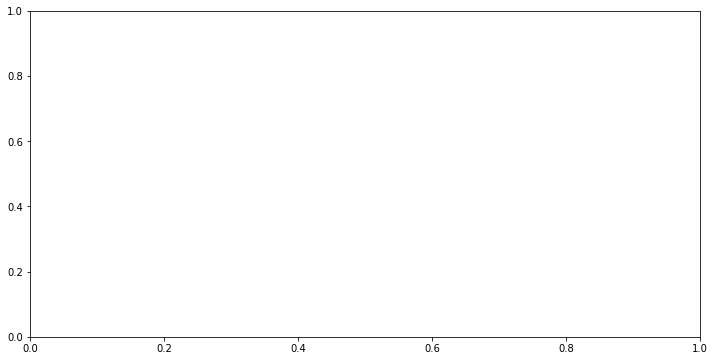

In [20]:

# Categorical plot to visualize the relationship between Employment Type, Age at Loan Origination, and Default Status

plt.figure(figsize=(12, 6))
sns.violinplot(x='V14', y='V17', hue='V32', data=df, split=True, palette='Set2')
plt.title('Employment Type vs Age at Loan Origination by Default Status')
plt.xlabel('Employment Type')
plt.ylabel('Age at Loan Origination')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Non-Defaulter', 'Defaulter']  # New legend labels
plt.legend(handles, new_labels, title='Default Status', loc='upper right')
plt.grid(True)
plt.show()

# Calculate default rates by combinations of Employment Type and Age at Loan Origination
default_rates_by_employment_age = df.groupby(['V14', 'V17'])['V32'].mean() * 100
print("Default rates by Employment Type and Age at Loan Origination:")
print(default_rates_by_employment_age)


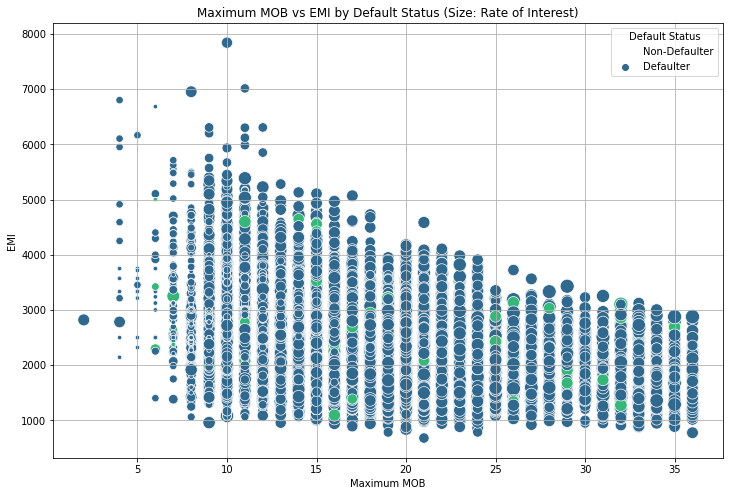

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

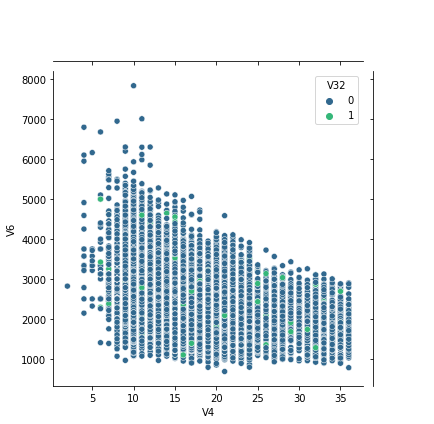

In [21]:

# Scatter plot to visualize the relationship between Maximum MOB, EMI, Rate of Interest, and Default Status
plt.figure(figsize=(12, 8))
sns.scatterplot(x='V4', y='V6', hue='V32', size='V12', data=df, palette='viridis', sizes=(20, 200))
plt.title('Maximum MOB vs EMI by Default Status (Size: Rate of Interest)')
plt.xlabel('Maximum MOB')
plt.ylabel('EMI')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Non-Defaulter', 'Defaulter']  # New legend labels
plt.legend(handles, new_labels, title='Default Status', loc='upper right')
plt.grid(True)
plt.show()

# Joint plot to visualize distribution and relationships with marginal histograms
sns.jointplot(x='V4', y='V6', data=df, hue='V32', palette='viridis')
plt.xlabel('EMI')
plt.ylabel('Rate of Interest')
plt.subplots_adjust(top=0.9)
plt.suptitle('Joint Plot: EMI vs Rate of Interest by Default Status', fontsize=14)
plt.show()

# Correlation analysis between Maximum MOB, EMI, Rate of Interest, and Default Status
correlation_matrix = df[['V4', 'V6', 'V12', 'V32']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Calculate average EMI for defaulters vs non-defaulters
average_emi_by_default_status = df.groupby('V32')['V6'].mean()
print("Average EMI by Default Status:")
print(average_emi_by_default_status)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

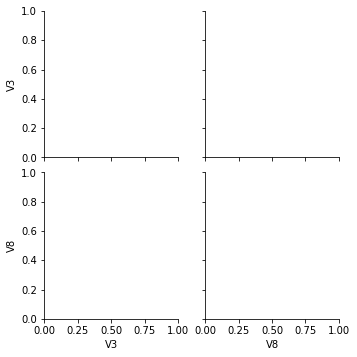

In [22]:


# Pair plot to visualize the relationship between V3, V8, V21, and Default Status
sns.pairplot(df, vars=['V3', 'V8'], hue='V32', palette='viridis')
plt.suptitle('Pair Plot:Number of Times Bounced in Recent 12 Months, Tenure vs Default Status', y=1.02, fontsize=14)
plt.show()

# Correlation analysis between V3, V8, V21, and Default Status
correlation_matrix = df[['V3', 'V8', 'V32']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Calculate average tenure for defaulters vs non-defaulters
average_tenure_by_default_status = df.groupby('V32')['V8'].mean()
print("Average Tenure by Default Status:")
print(average_tenure_by_default_status)


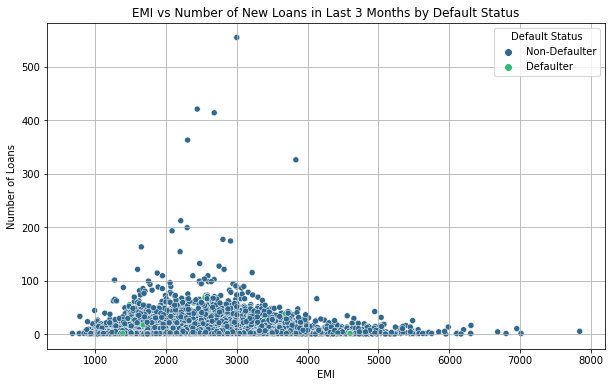

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

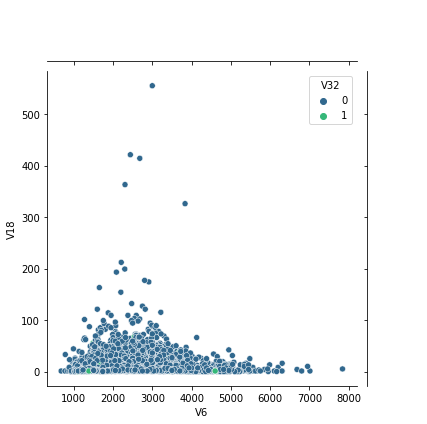

In [23]:

# Scatter plot to visualize the relationship between EMI, V22, and Default Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='V6', y='V18', hue='V32', data=df, palette='viridis')
plt.title('EMI vs Number of New Loans in Last 3 Months by Default Status')
plt.xlabel('EMI')
plt.ylabel('Number of Loans')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Non-Defaulter', 'Defaulter']  # New legend labels
plt.legend(handles, new_labels, title='Default Status', loc='upper right')
plt.grid(True)
plt.show()

# Joint plot to visualize distribution and relationships with marginal histograms
sns.jointplot(x='V6', y='V18', data=df, hue='V32', palette='viridis')
plt.xlabel('EMI')
plt.ylabel('Number of Loans')
plt.subplots_adjust(top=0.9)
plt.suptitle('Joint Plot: EMI vs Number of Loans by Default Status', fontsize=14)
plt.show()

# Correlation analysis between EMI, V22, and Default Status
correlation_matrix = df[['V6', 'V18', 'V32']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Calculate average EMI for defaulters vs non-defaulters
average_emi_by_default_status = df.groupby('V32')['V6'].mean()
print("Average EMI by Default Status:")
print(average_emi_by_default_status)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


# Drop any rows with missing values
df.dropna(inplace=True)

# Encode categorical variables if necessary
le = LabelEncoder()
df['V13'] = le.fit_transform(df['V13'])  # Example: Encoding Gender column if it's categorical

# Split dataset into features (X) and target variable (y)
X = df.drop('V32', axis=1)
y = df['V32']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_pred)

print("Logistic Regression:")
print(classification_report(y_test, lr_pred))
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"ROC AUC Score: {lr_roc_auc:.4f}")

# Model 2: Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_roc_auc = roc_auc_score(y_test, dt_pred)

print("\nDecision Tree Classifier:")
print(classification_report(y_test, dt_pred))
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"ROC AUC Score: {dt_roc_auc:.4f}")

# Model 3: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred)

print("\nRandom Forest Classifier:")
print(classification_report(y_test, rf_pred))
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"ROC AUC Score: {rf_roc_auc:.4f}")

# Feature importance analysis for Random Forest Classifier
feature_importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_feature_importances = feature_importances[sorted_indices]

plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names, palette='viridis')
plt.title('Feature Importances - Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


ValueError: could not convert string to float: 'TL'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Example DataFrame structure (columns V13 to V28):
# df = pd.read_csv('your_dataset.csv')

# Assuming df already contains columns from V13 to V28

# Drop any rows with missing values
df.dropna(inplace=True)

# Encode categorical variables if necessary
# Example: Encoding Gender column if it's categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['V13'] = le.fit_transform(df['V13'])

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(df[['V13', 'V17', 'V21', 'V27']])  # Example: Selecting relevant features for clustering

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because we started from k=2

# Perform K-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

# Visualize clusters
sns.pairplot(df, hue='Cluster', palette='viridis', vars=['V13', 'V17', 'V21', 'V27'])
plt.suptitle('Pair Plot: Clusters based on V13, V17, V21, V27', y=1.02, fontsize=14)
plt.show()

# Analyze clusters by default risk
cluster_summary = df.groupby('Cluster').mean()
default_rates = df.groupby('Cluster')['V32'].mean() * 100
cluster_summary['Default Rate (%)'] = default_rates

print("Cluster Summary:")
print(cluster_summary[['V13', 'V17', 'V21', 'V27', 'Default Rate (%)']])

# Develop targeted strategies for each cluster based on default risk analysis
# Example strategies:
# Cluster 0: Young professionals with moderate income - Offer financial planning services to manage debt.
# Cluster 1: High-income earners with secure job tenure - Focus on personalized investment opportunities.
# Cluster 2: Elderly pensioners with fixed income - Provide flexible repayment options and insurance products.

